Проведем exploratory data analysis с датасетом дорожно-транспортных проишествий с участием велосипедистов, ссылка на городской портал г. Мадрида, Испания

https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=20f4a87ebb65b510VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df_22 = pd.read_csv('C:/Users/mgtqw/data-analysis-notes/df_AccidentesBicicletas_2022.csv', sep = ';')
df_23 = pd.read_csv('C:/Users/mgtqw/data-analysis-notes/df_AccidentesBicicletas_2023.csv', sep = ';')
df_24 = pd.read_csv('C:/Users/mgtqw/data-analysis-notes/df_AccidentesBicicletas_2024.csv', sep = ';')
df = pd.concat([df_22, df_23, df_24], axis = 0)

In [10]:
df.columns

Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga'],
      dtype='object')

In [11]:
# Переведем названия колонок на англ для удобства обращения
df = df.rename(columns={
    'num_expediente': 'case_number',
    'fecha': 'date',
    'hora': 'time',
    'localizacion': 'location',
    'numero': 'number',
    'cod_distrito': 'district_code',
    'distrito': 'district',
    'tipo_accidente': 'accident_type',
    'estado_meteorológico': 'weather_condition',
    'tipo_vehiculo': 'vehicle_type',
    'tipo_persona': 'person_type',
    'rango_edad': 'age_range',
    'sexo': 'gender',
    'cod_lesividad': 'severity_code',
    'lesividad': 'severity',
    'coordenada_x_utm': 'coord_x_utm',
    'coordenada_y_utm': 'coord_y_utm',
    'positiva_alcohol': 'positive_alcohol',
    'positiva_droga': 'positive_drug'
    })

In [26]:
df.head(2)

,case_number,date,time,location,number,district_code,district,accident_type,weather_condition,vehicle_type,person_type,age_range,gender,severity_code,severity,coord_x_utm,coord_y_utm,positive_alcohol,positive_drug
0,2022S000034,02/01/2022,0:05:00,"CALL. MARIA TERESA SAENZ DE HEREDIA, 6",6,15,CIUDAD LINEAL,Caída,Despejado,Bicicleta EPAC (pedaleo asistido),Conductor,De 25 a 29 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,444.462.918,4.474.808.752,S,NaN
1,2022S000290,05/01/2022,10:45:00,PASEO. MARQUES DE MONISTROL / GTA. PUENTE DE S...,1,10,LATINA,Colisión fronto-lateral,Se desconoce,Bicicleta EPAC (pedaleo asistido),Conductor,De 25 a 29 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,438.584.377,4.473.973.210,N,NaN


In [27]:
df.dtypes

case_number           object
date                  object
time                  object
location              object
number                object
district_code          int64
district              object
accident_type         object
weather_condition     object
vehicle_type          object
person_type           object
age_range             object
gender                object
severity_code        float64
severity              object
coord_x_utm           object
coord_y_utm           object
positive_alcohol      object
positive_drug        float64
dtype: object

In [13]:
df.describe()

,district_code,severity_code,positive_drug
count,2170.000000,1832.000000,5.0
mean,8.481106,5.869541,1.0
std,5.741782,4.002854,0.0
min,1.000000,1.000000,1.0
25%,3.000000,2.000000,1.0
50%,8.000000,6.000000,1.0
75%,13.000000,7.000000,1.0
max,21.000000,14.000000,1.0


Text(0.5, 1.0, 'Распределение типов аварий')

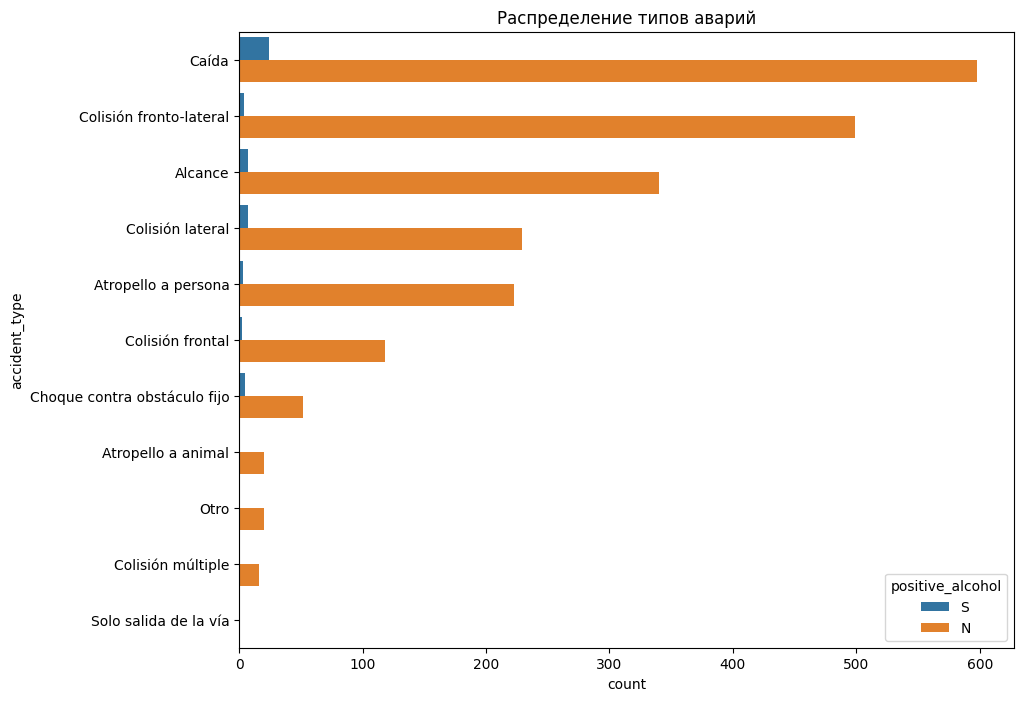

In [36]:
# давайте посмотрим распределение типов аварий в которых учасвуют велосипедисты
plt.figure(figsize = (10, 8))
sns.countplot(y = 'accident_type', hue = df.positive_alcohol, data = df, order = df['accident_type'].value_counts().index)
plt.title('Распределение типов аварий')

Text(0.5, 1.0, 'Погодные условия')

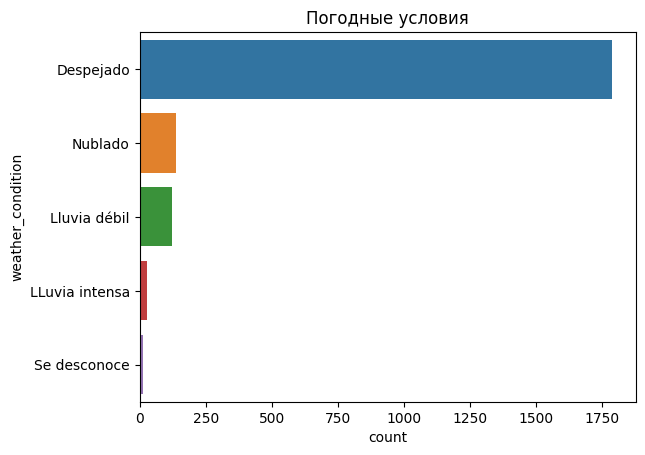

In [37]:
# погодные условия
sns.countplot(y = 'weather_condition', data = df, order = df['weather_condition'].value_counts().index)
plt.title('Погодные условия')

Text(0.5, 1.0, 'Распределения по степени тяжести инцидентов')

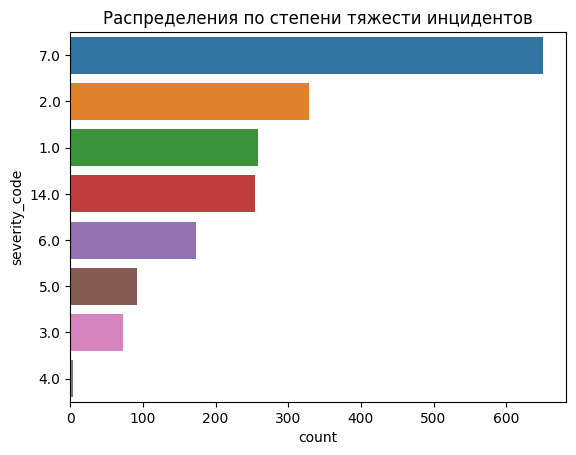

In [38]:
# распределение по степени тяжести травм
sns.countplot(y = 'severity_code', data = df, order = df['severity_code'].value_counts().index)
plt.title('Распределения по степени тяжести инцидентов')

In [18]:
df.gender.value_counts()

gender
Hombre         1687
Mujer           441
Desconocido      42
Name: count, dtype: int64

In [19]:
df.positive_alcohol.value_counts()

positive_alcohol
N    2115
S      53
Name: count, dtype: int64

In [20]:
df.person_type.value_counts()

person_type
Conductor    2026
Peatón        132
Pasajero       12
Name: count, dtype: int64